# Python Programming Project - Alzheimey Dataset

# EDA on Datasets

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('../../../datasets/dataset.csv')


In [3]:
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


In [4]:
df.dtypes

RowId                          object
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID  

### Transform the data

In [5]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Replacing missing values (example: replacing NaNs with a placeholder or mean/median)
# df.fillna(value={'column_name': 'placeholder_value'}, inplace=True)  # Replace 'column_name' with actual column names

# Discovering invalid values
# Example: Checking for unexpected data types or outliers
invalid_values_summary = df.describe(include='all')
invalid_values_summary


,rowid,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,...,stratification2,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
count,284142,284142.000000,284142.000000,284142,284142,284142,284142,284142,284142,284142,...,247269,253653,284142,284142,284142,284142.000000,284142,284142,284142,284142
unique,36046,NaN,NaN,59,59,1,7,39,39,2,...,7,54,7,39,39,NaN,1,3,3,8
top,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,NaN,NaN,US,"United States, DC & Territories",BRFSS,Overall Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"White, non-Hispanic",POINT (-120.1550313 44.56744942),C01,TMC01,Q03,NaN,AGE,AGE_OVERALL,RACE,OVERALL
freq,15,NaN,NaN,6132,6132,284142,96753,11092,11092,262048,...,36450,5916,96753,11092,11092,NaN,284142,95233,178431,36873
mean,NaN,2018.596065,2018.657735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,800.322677,NaN,NaN,NaN,NaN
std,NaN,2.302815,2.360105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2511.564977,NaN,NaN,NaN,NaN
min,NaN,2015.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2017.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN
50%,NaN,2019.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN
75%,NaN,2021.000000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,NaN


### Checking for missing values and also their percentage

In [6]:
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

print(30*'---')

missing_percentage = (df.isna().sum() / len(df)) * 100
print("Percentage of missing values:\n", missing_percentage)

Missing values in each column:
 rowid                              0
yearstart                          0
yearend                            0
locationabbr                       0
locationdesc                       0
datasource                         0
class                              0
topic                              0
question                           0
data_value_unit                    0
datavaluetypeid                    0
data_value_type                    0
data_value                     91334
data_value_alt                 91334
data_value_footnote_symbol    174166
data_value_footnote           174166
low_confidence_limit           91545
high_confidence_limit          91545
stratificationcategory1            0
stratification1                    0
stratificationcategory2        36873
stratification2                36873
geolocation                    30489
classid                            0
topicid                            0
questionid                         0
locati

### Imputing the numerical columns by mean

In [7]:
float_numerical_columns = df.select_dtypes(include=['float64']).columns

for col in float_numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

df[float_numerical_columns].isna().sum()

data_value               0
data_value_alt           0
low_confidence_limit     0
high_confidence_limit    0
dtype: int64

### Imputing the categorical columns by frequency/mode

In [8]:
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df[categorical_columns].isna().sum()

rowid                         0
locationabbr                  0
locationdesc                  0
datasource                    0
class                         0
topic                         0
question                      0
data_value_unit               0
datavaluetypeid               0
data_value_type               0
data_value_footnote_symbol    0
data_value_footnote           0
stratificationcategory1       0
stratification1               0
stratificationcategory2       0
stratification2               0
geolocation                   0
classid                       0
topicid                       0
questionid                    0
stratificationcategoryid1     0
stratificationid1             0
stratificationcategoryid2     0
stratificationid2             0
dtype: int64

### Summary of numerical columns

In [9]:
numerical_summary = df.describe()
numerical_summary

,yearstart,yearend,data_value,data_value_alt,low_confidence_limit,high_confidence_limit,locationid
count,284142.000000,284142.000000,284142.000000,284142.000000,284142.000000,284142.000000,284142.000000
mean,2018.596065,2018.657735,37.676757,37.676757,33.027824,42.595333,800.322677
std,2.302815,2.360105,20.769560,20.769560,19.997904,21.534500,2511.564977
min,2015.000000,2015.000000,0.000000,0.000000,-0.700000,1.300000,1.000000
25%,2017.000000,2017.000000,24.200000,24.200000,19.400000,29.200000,19.000000
50%,2019.000000,2019.000000,37.676757,37.676757,33.027824,42.595333,34.000000
75%,2021.000000,2021.000000,42.400000,42.400000,35.700000,50.000000,49.000000
max,2022.000000,2022.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


#### The summary of numerical columns usually provides us features with count, mean, median, standard deviation, quartile analysis of every column in the dataset.

### Summary of categorical columns

In [10]:
categorical_summary = df.select_dtypes(include=['object', 'category', 'bool']).describe()
categorical_summary

,rowid,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,datavaluetypeid,data_value_type,...,stratificationcategory2,stratification2,geolocation,classid,topicid,questionid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
count,284142,284142,284142,284142,284142,284142,284142,284142,284142,284142,...,284142,284142,284142,284142,284142,284142,284142,284142,284142,284142
unique,36046,59,59,1,7,39,39,2,2,2,...,2,7,54,7,39,39,1,3,3,8
top,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,US,"United States, DC & Territories",BRFSS,Overall Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,Percentage,...,Race/Ethnicity,"White, non-Hispanic",POINT (-120.1550313 44.56744942),C01,TMC01,Q03,AGE,AGE_OVERALL,RACE,OVERALL
freq,15,6132,6132,284142,96753,11092,11092,262048,262048,262048,...,215304,73323,36405,96753,11092,11092,284142,95233,178431,36873


#### The summary of categorical columns usually provides us features with number of unique values in the columns and top cout category in the column. From this summary we can summarize which category is dominating on certain features/series in a dataset.

# Data Visualization

In [11]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# df['low_confidence_limit'].hist(bins=20)
# plt.title('Distribution of Numerical Column')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()


In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure(figsize=(12, 8))

# sns.regplot(
#     x='data_value',
#     y='low_confidence_limit',
#     data=df,
#     scatter_kws={'color': 'blue', 'alpha': 0.5},
#     line_kws={'color': 'red', 'label': 'Trend Line'},
# )

# plt.title('Data Value vs Low Confidence Limit (Advanced)', fontsize=16)
# plt.xlabel('Data Value', fontsize=14)
# plt.ylabel('Low Confidence Limit', fontsize=14)

# plt.grid(visible=True, linestyle='--', alpha=0.7)

# plt.legend()

# plt.show()


In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Create a figure and axes
# plt.figure(figsize=(12, 8))

# # Create a scatter plot with a regression line
# sns.regplot(
#     x='data_value',
#     y='high_confidence_limit',
#     data=df,
#     scatter_kws={'color': 'blue', 'alpha': 0.5},  # Customize scatter points
#     line_kws={'color': 'red', 'label': 'Trend Line'},  # Customize regression line
# )

# # Add labels and a title
# plt.title('Data Value vs Low Confidence Limit (Advanced)', fontsize=16)
# plt.xlabel('Data Value', fontsize=14)
# plt.ylabel('Low Confidence Limit', fontsize=14)

# # Add gridlines
# plt.grid(visible=True, linestyle='--', alpha=0.7)

# # Show legend
# plt.legend()

# # Show the plot
# plt.show()


In [14]:
# plt.figure(figsize=(12, 8))
# sns.scatterplot(
#     x='data_value',
#     y='high_confidence_limit',
#     hue='stratification1',
#     data=df,
#     palette='viridis',
#     alpha=0.8,
# )

# plt.title('Data Value vs High Confidence Limit (Class Highlight)', fontsize=16)
# plt.xlabel('Data Value', fontsize=14)
# plt.ylabel('High Confidence Limit', fontsize=14)

# plt.grid(visible=True, linestyle='--', alpha=0.7)

# plt.show()


<!-- # Analysis of Scatter Plot: Data Value vs High Confidence Limit

## Key Insights:

### Variables:
- **X-axis:** `Data Value` - This represents a key numeric metric in the dataset.
- **Y-axis:** `High Confidence Limit` - Another numeric metric representing the upper bound of a statistical confidence interval.

### Data Segmentation:
The data points are color-coded based on the `stratification1` column, which categorizes the data into three groups:
1. **50-64 years:** Represented by blue points.
2. **65 years or older:** Represented by green points.
3. **Overall:** Represented by teal points.

### Observations:
1. **Positive Linear Relationship:**
   - There is a clear linear trend between `Data Value` and `High Confidence Limit`, suggesting a strong positive correlation. As the `Data Value` increases, the `High Confidence Limit` also increases proportionally.

3. **Range of Values:**
   - `Data Value` ranges roughly from **0 to 80**.
   - `High Confidence Limit` ranges roughly from **0 to 90**. -->


In [15]:
# plt.figure(figsize=(12, 8))
# sns.scatterplot(
#     x='data_value',
#     y='high_confidence_limit',
#     hue='stratification2',
#     data=df,
#     palette='viridis',
#     alpha=0.8,
# )

# plt.title('Data Value vs High Confidence Limit (Class Highlight)', fontsize=16)
# plt.xlabel('Data Value', fontsize=14)
# plt.ylabel('High Confidence Limit', fontsize=14)

# plt.grid(visible=True, linestyle='--', alpha=0.7)

# plt.show()


In [16]:
# # Bar plot for a categorical column
# df['stratification1'].value_counts().plot(kind='bar', figsize=(10, 6))
# plt.title('Category Distribution')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.show()


In [17]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.countplot(data=df, x='locationdesc', hue='class')
# plt.title("Comparison of Locations and class of patients")
# plt.xlabel("Locations")
# plt.ylabel("Count")
# plt.legend(title="Class")
# plt.show()

In [18]:
# heatmap_data = pd.crosstab(df['locationdesc'], df['class'])

# sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
# plt.title("Heatmap of Locations and Class")
# plt.xlabel("Class")
# plt.ylabel("Locations")
# plt.show()

## Comprehensive Analysis of Trends, Growth

In this analysis, we explored the temporal and regional patterns in the dataset. The annual growth rate of reported data entries highlighted significant year-over-year changes, reflecting trends in reporting behavior. We also examined the normalized data values over time, showcasing consistent trends or fluctuations across years. A state-wise analysis revealed the top 10 states with the highest average data values, offering insights into regional disparities. Finally, a heatmap provided a comprehensive view of data value distribution across states and years, uncovering temporal and geographical variations in the dataset.

In [19]:
# Starting the analysis with the number of patients reported each year
df['yearstart'] = pd.to_datetime(df['yearstart'], format='%Y')
df['yearend'] = pd.to_datetime(df['yearend'],format='%Y')
yearly_data_start = df['yearstart'].value_counts()
yearly_data_end = df['yearend'].value_counts()
print(yearly_data_start.index)
print(yearly_data_end.index)

DatetimeIndex(['2021-01-01', '2019-01-01', '2022-01-01', '2020-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='yearstart', freq=None)
DatetimeIndex(['2022-01-01', '2021-01-01', '2020-01-01', '2015-01-01',
               '2019-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='yearend', freq=None)


2015-01-01    70040
2016-01-01    68290
2017-01-01    66858
2018-01-01    61096
2019-01-01    72839
Name: count, dtype: int64


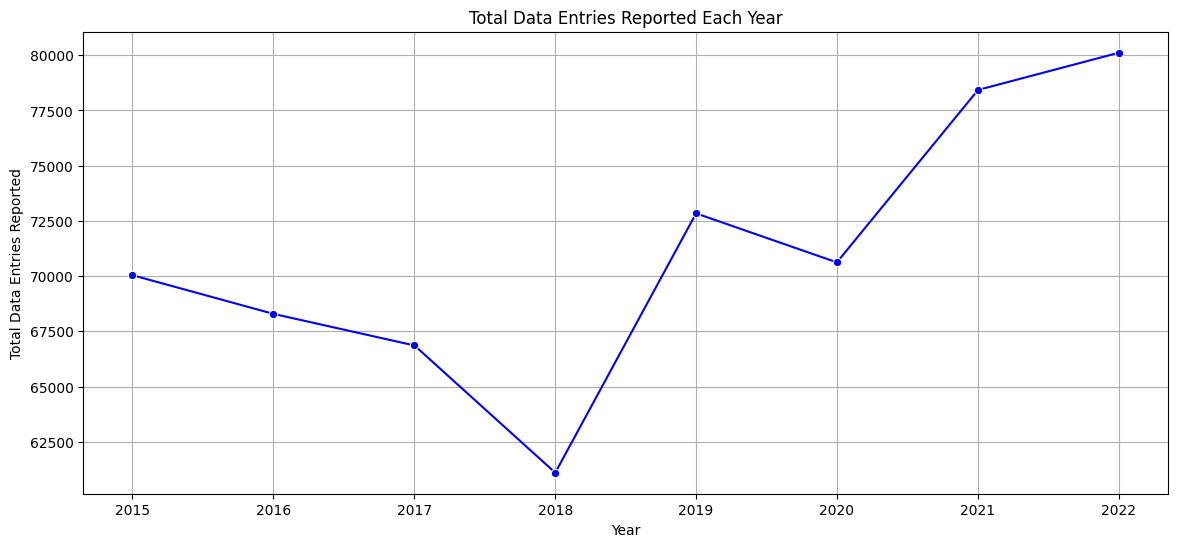

In [20]:
# Combine both counts into a single dataframe
yearly_data = pd.concat([yearly_data_start, yearly_data_end], axis=0).groupby(level=0).sum()
print(yearly_data.head())

# Convert the series to a DataFrame
yearly_data = yearly_data.reset_index()
yearly_data.columns = ['Year', 'TotalReported']
# Plot the total number of reported data entries by year
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_data, x='Year', y='TotalReported', marker='o', color='b')
plt.title('Total Data Entries Reported Each Year')
plt.xlabel('Year')
plt.ylabel('Total Data Entries Reported')
plt.grid(True)
plt.show()

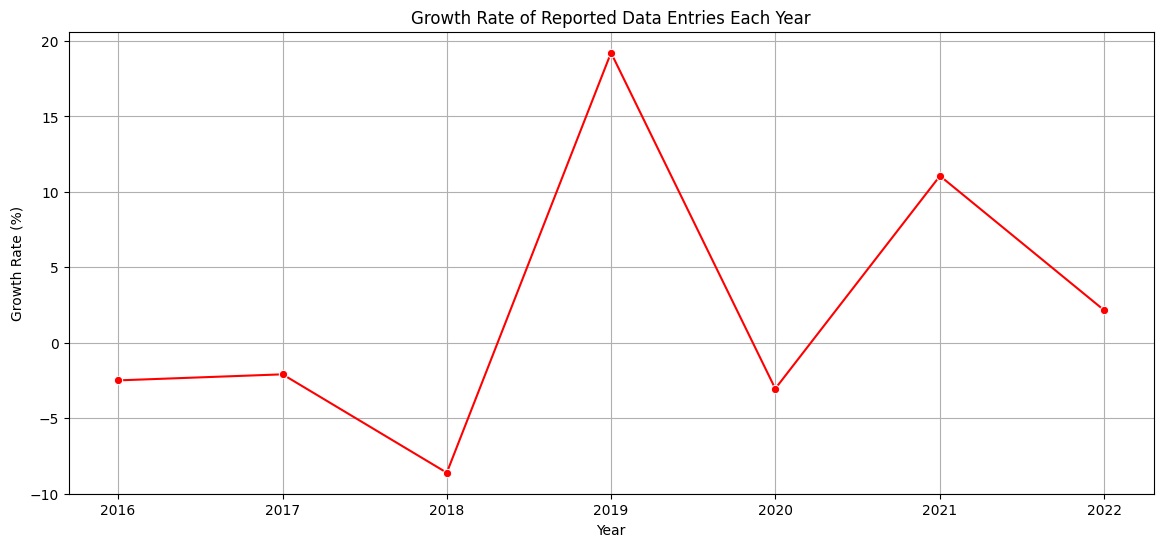

In [21]:
# Calculate the growth rate for each year
yearly_data['GrowthRate'] = yearly_data['TotalReported'].pct_change() * 100  

# Plot the growth rate of reported data entries by year
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_data, x='Year', y='GrowthRate', marker='o', color='r')
plt.title('Growth Rate of Reported Data Entries Each Year')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

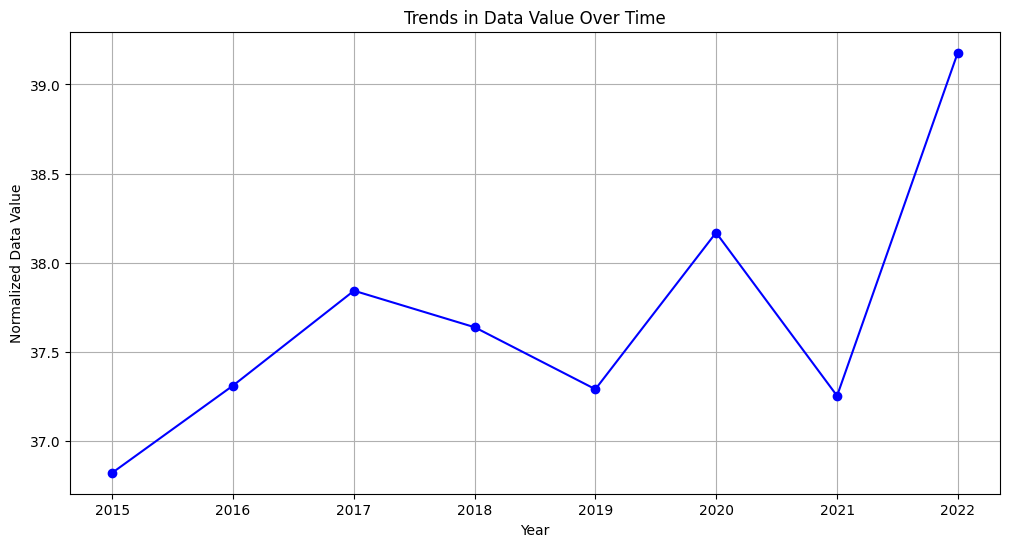

In [22]:
# Group by YearStart and calculate the mean Data_Value
yearly_data = df.groupby('yearstart')['data_value'].mean().reset_index()

# Plot the trend over the years
plt.figure(figsize=(12,6))
plt.plot(yearly_data['yearstart'], yearly_data['data_value'], marker='o', linestyle='-', color='b')
plt.title('Trends in Data Value Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Data Value')
plt.grid(True)
plt.show()


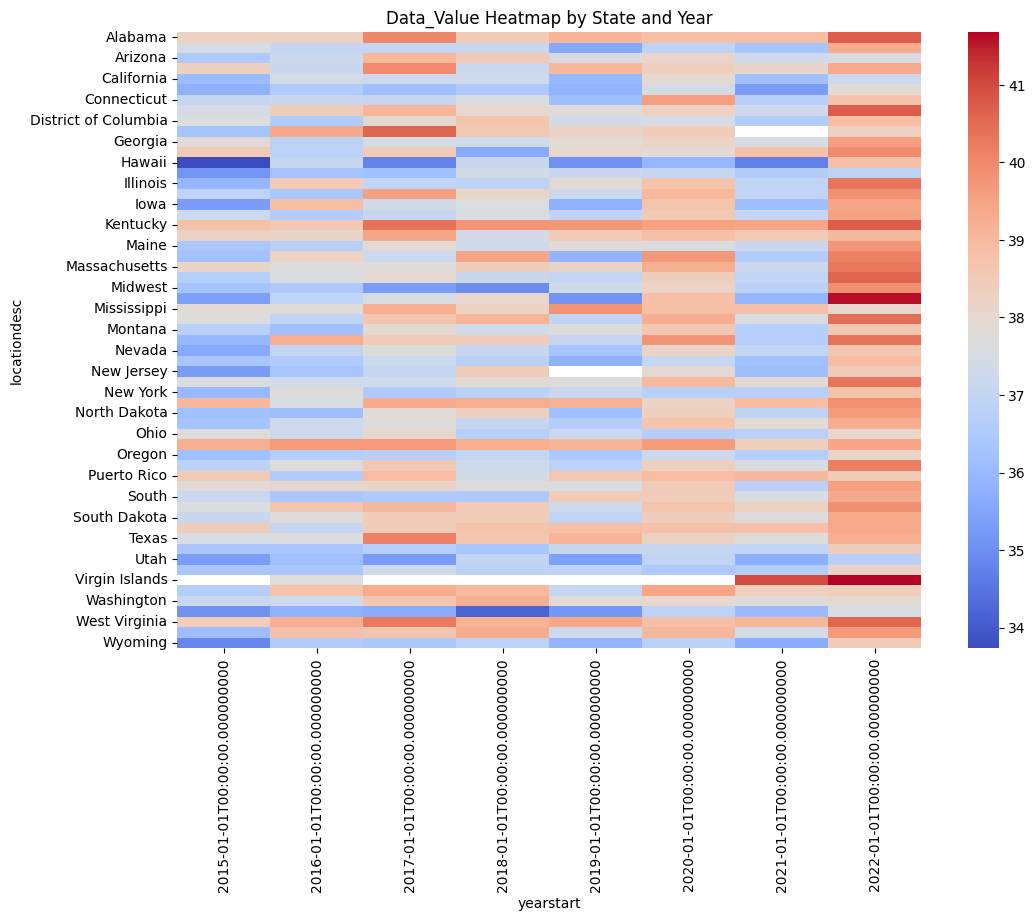

In [23]:
# Heatmap of Data_Value by State and Year
pivot_table = df.pivot_table(index='locationdesc', columns='yearstart', values='data_value', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Data_Value Heatmap by State and Year')
plt.show()

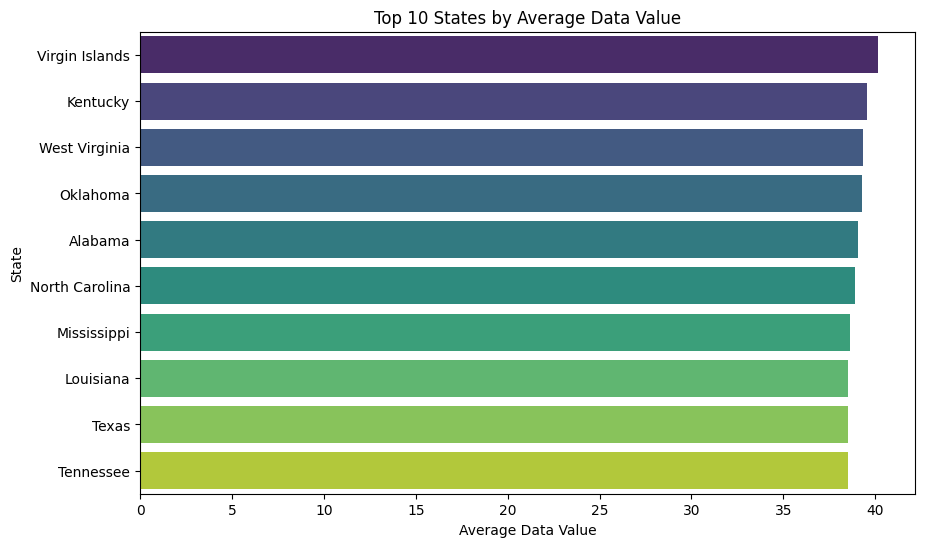

In [24]:
# Aggregate data by location
state_avg = df.groupby('locationdesc')['data_value'].mean().reset_index()

# Top 10
top_states = state_avg.sort_values('data_value',ascending=False).head(10)

# Visaualizing the data
plt.figure(figsize=(10, 6))
plt.barh(top_states['locationdesc'], top_states['data_value'], color=plt.cm.viridis(range(len(top_states))))

# Add title and labels
sns.barplot(data=top_states, x='data_value', y='locationdesc', hue='locationdesc', palette='viridis', legend=False)
plt.title("Top 10 States by Average Data Value")
plt.xlabel("Average Data Value")
plt.ylabel("State")
plt.show()

## Confidence Interval Analysis

In the first graph, we see the confidence limits for each location, showing the range of uncertainty around the data. Locations with wider gaps between the low and high confidence lines indicate more uncertainty about the data in those areas. These regions may need more reliable data collection methods or further studies to reduce this uncertainty. On the other hand, locations with narrower gaps show more confidence in the data, meaning the estimates for Alzheimer’s prevalence in these areas are more reliable.

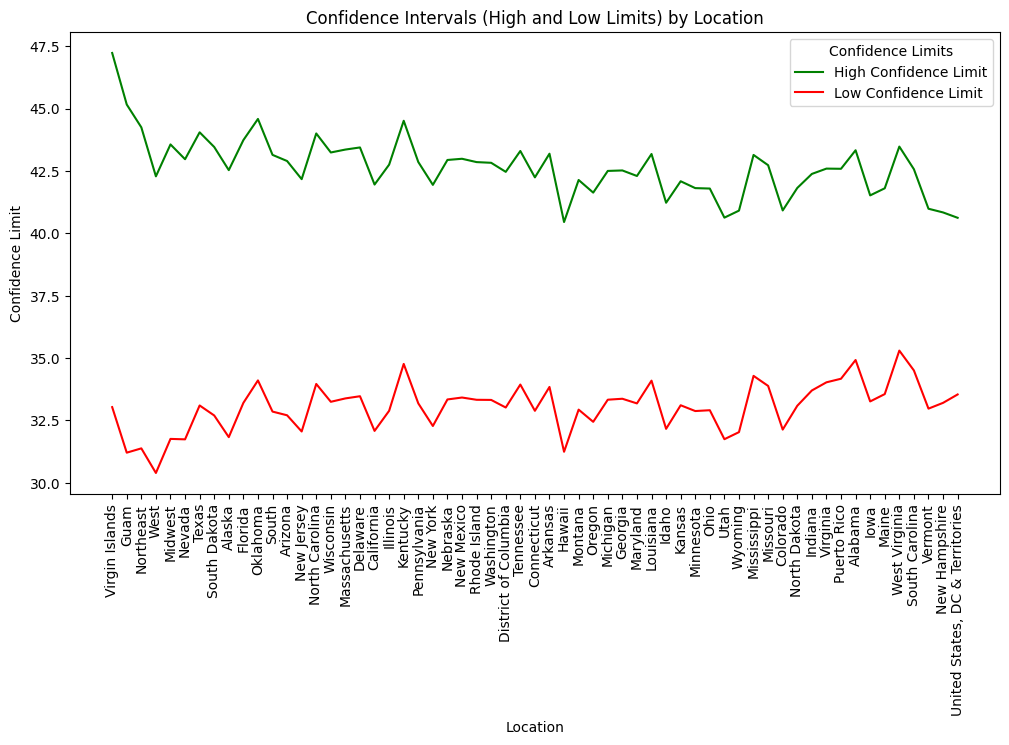

In [26]:
df['Confidence_Interval_Range'] = df['high_confidence_limit'] - df['low_confidence_limit']
df_location_confidence = df.groupby('locationdesc').agg({
    'low_confidence_limit': 'mean',
    'high_confidence_limit': 'mean',
    'Confidence_Interval_Range': 'mean'
}).reset_index()
df_location_confidence_sorted = df_location_confidence.sort_values('Confidence_Interval_Range', ascending=False)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_location_confidence_sorted, x='locationdesc', y='high_confidence_limit', label='High Confidence Limit', color='green')
sns.lineplot(data=df_location_confidence_sorted, x='locationdesc', y='low_confidence_limit', label='Low Confidence Limit', color='red')
plt.title('Confidence Intervals (High and Low Limits) by Location')
plt.xlabel('Location')
plt.ylabel('Confidence Limit')
plt.xticks(rotation=90)
plt.legend(title='Confidence Limits')
plt.show()

The second graph shows the average confidence for each location. By focusing on areas with the widest confidence limits, we can prioritize those regions for further research and data validation. Ensuring more accurate data in these areas will help us make better-informed decisions and interventions for Alzheimer’s care.

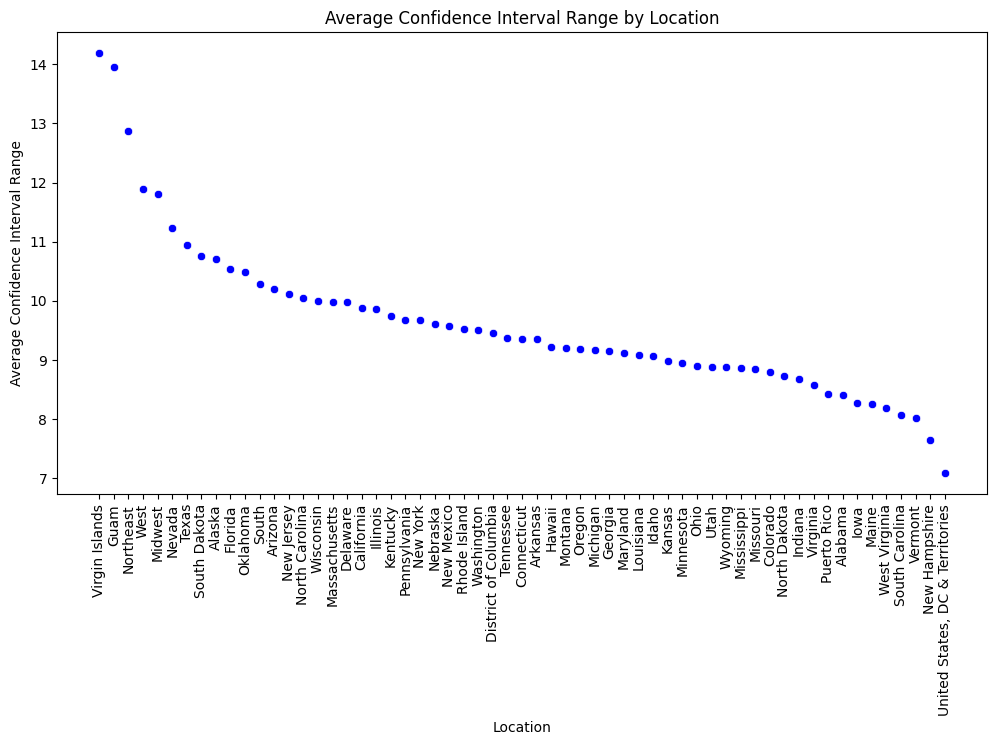

In [28]:
# Confidence Interval Range
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_location_confidence_sorted, x='locationdesc', y='Confidence_Interval_Range', color='blue')
plt.title('Average Confidence Interval Range by Location')
plt.xlabel('Location')
plt.ylabel('Average Confidence Interval Range')
plt.xticks(rotation=90)
plt.show()

Together, these graphs highlight areas where we need to focus on improving the reliability of Alzheimer’s data. Locations with higher uncertainty should be a priority for better data collection and analysis, while areas with narrower confidence limits are more dependable and may require less immediate attention.

From Class Cognitive Decline, finding best location where data can be reliable based on location

In [57]:
# Calculating Average Confidence label grouped by location and topic
df_Cognitive_Decline = df[df['class'] == 'Cognitive Decline'].copy()
df_Cognitive_Decline['Average_Confidence_Level'] = (
    df_Cognitive_Decline['low_confidence_limit'] + df_Cognitive_Decline['high_confidence_limit']
) / 2
avg_confidence_by_location = (
    df_Cognitive_Decline.groupby(['locationdesc', 'topic'])['Average_Confidence_Level']
    .mean()
    .reset_index()
)
avg_confidence_by_location

,locationdesc,topic,Average_Confidence_Level
0,Alabama,Functional difficulties associated with subjec...,43.507593
1,Alabama,Need assistance with day-to-day activities bec...,39.722299
2,Alabama,Subjective cognitive decline or memory loss am...,23.044620
3,Alabama,Talked with health care professional about sub...,42.136269
4,Alaska,Functional difficulties associated with subjec...,36.316158
...,...,...,...
223,Wisconsin,Talked with health care professional about sub...,41.924095
224,Wyoming,Functional difficulties associated with subjec...,34.289122
225,Wyoming,Need assistance with day-to-day activities bec...,31.605789
226,Wyoming,Subjective cognitive decline or memory loss am...,23.584956


In [58]:
# Finding highest for each topic
highest_confidence_by_topic = (
    avg_confidence_by_location.loc[avg_confidence_by_location.groupby('topic')['Average_Confidence_Level'].idxmax()]
)
highest_confidence_by_topic


,locationdesc,topic,Average_Confidence_Level
164,Puerto Rico,Functional difficulties associated with subjec...,53.250863
165,Puerto Rico,Need assistance with day-to-day activities bec...,52.277863
118,Nevada,Subjective cognitive decline or memory loss am...,26.344122
167,Puerto Rico,Talked with health care professional about sub...,53.246863


Puerto Rico emerges as the leader in confidence values across multiple Alzheimer’s-related topics, demonstrating exceptional reliability in its data. For issues like functional difficulties, needing assistance with daily activities, and talking with healthcare professionals about cognitive decline, Puerto Rico consistently ranks at the top, reflecting a clear and dependable understanding of the challenges faced by its population. This high confidence empowers the region to implement precise, targeted interventions, improving care and resources for those affected by Alzheimer’s. Its strong data serves as a model for other regions, showcasing how accurate information can drive effective, informed action in Alzheimer’s care.